###Predicting Data Professionals' Salary with PyCaret

#####By [Idris Abdulkareem](https://www.linkedin.com/in/idrisinkedin/)

###Install required libraries and modules

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


###Import required libraries and modules

In [27]:
import pandas as pd
import pandas_profiling
import pycaret
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


###Section 1 - Data Cleaning

In [3]:
# Load dataset
dataset = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)
dataset.head(5)

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   
2                    462                        30-34   
3                    293                        18-21   
4                    851                        55-59   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   
2                                    Algeria   
3                                      Egypt   
4                                     France   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   
2                                                 No   
3                                                Yes   
4                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                           Coursera   
4                                           Coursera   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                                edX   
4                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                               Kaggle Learn Courses   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                           DataCamp   
4                                                NaN   

                                                Q6_5  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                Q6_6  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                            Udacity   
4                                                NaN   

                                                Q6_7  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                              Udemy   
4                                              Udemy   

                                                Q6_8  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                  LinkedIn Learning   
4                                                NaN   

                                                Q6_9  \
0  On which

In [4]:
dataset.shape

(23998, 296)

The first row after the header contains questions from the survey and it is not relevant to our model. So, it was dropped from the dataset.

In [5]:
# drop first row after header
dataset.drop(0, inplace=True)
# reset row index
dataset.reset_index(inplace=True, drop=True)

In [6]:
dataset.head()

Duration (in seconds)     Q2   Q3       Q4   Q5      Q6_1 Q6_2  \
0                   121  30-34  Man    India   No       NaN  NaN   
1                   462  30-34  Man  Algeria   No       NaN  NaN   
2                   293  18-21  Man    Egypt  Yes  Coursera  edX   
3                   851  55-59  Man   France   No  Coursera  NaN   
4                   232  45-49  Man    India  Yes       NaN  NaN   

                   Q6_3      Q6_4 Q6_5     Q6_6   Q6_7               Q6_8  \
0                   NaN       NaN  NaN      NaN    NaN                NaN   
1                   NaN       NaN  NaN      NaN    NaN                NaN   
2                   NaN  DataCamp  NaN  Udacity  Udemy  LinkedIn Learning   
3  Kaggle Learn Courses       NaN  NaN      NaN  Udemy                NaN   
4                   NaN       NaN  NaN      NaN    NaN                NaN   

  Q6_9                                              Q6_10 Q6_11  Q6_12  \
0  NaN                                                NaN   NaN  Other   
1  NaN  University Courses (resulting in a university ...   NaN    NaN   
2  NaN  University Courses (resulting in a university ...   NaN    NaN   
3  NaN                                                NaN   NaN  Other   
4  NaN                                                NaN   NaN  Other   

                 Q7_1                                 Q7_2 Q7_3  \
0                 NaN                                  NaN  NaN   
1  University courses                                  NaN  NaN   
2                 NaN  Online courses (Coursera, EdX, etc)  NaN   
3                 NaN  Online courses (Coursera, EdX, etc)  NaN   
4  University courses                                  NaN  NaN   

                                     Q7_4  \
0                                     NaN   
1                                     NaN   
2  Video platforms (YouTube, Twitch, etc)   
3                                     NaN   
4                                     NaN   

                                    Q7_5 Q7_6 Q7_7  \
0                                    NaN  NaN  NaN   
1  Kaggle (notebooks, competitions, etc)  NaN  NaN   
2  Kaggle (notebooks, competitions, etc)  NaN  NaN   
3  Kaggle (notebooks, competitions, etc)  NaN  NaN   
4                                    NaN  NaN  NaN   

                                                  Q8   Q9 Q10_1 Q10_2 Q10_3  \
0                                                NaN  NaN   NaN   NaN   NaN   
1                                    Master’s degree  Yes   NaN   NaN    No   
2                                  Bachelor’s degree  NaN   NaN   NaN   NaN   
3  Some college/university study without earning ...  NaN   NaN   NaN   NaN   
4                                  Bachelor’s degree  NaN   NaN   NaN   NaN   

           Q11   Q12_1 Q12_2 Q12_3 Q12_4 Q12_5 Q12_6 Q12_7 Q12_8 Q12_9 Q12_10  \
0          NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1    1-3 years     NaN   NaN   NaN   NaN   NaN   NaN  Java   NaN   NaN    NaN   
2    1-3 years  Python   NaN   SQL     C   NaN   NaN   NaN   NaN   NaN    NaN   
3  10-20 years  Python   NaN   SQL   NaN   NaN   NaN   NaN   NaN  Bash    NaN   
4   5-10 years  Python   NaN   NaN   NaN   NaN   C++  Java   NaN   NaN    NaN   

   Q12_11 Q12_12 Q12_13 Q12_14 Q12_15        Q13_1 Q13_2 Q13_3  \
0     NaN    NaN    NaN    NaN    NaN          NaN   NaN   NaN   
1     NaN    NaN    NaN    NaN    NaN          NaN   NaN   NaN   
2  MATLAB    NaN    NaN    NaN    NaN  JupyterLab    NaN   NaN   
3     NaN    NaN    NaN    NaN    NaN          NaN   NaN   NaN   
4     NaN    NaN    NaN    NaN    NaN          NaN   NaN   NaN   

                           Q13_4      Q13_5       Q13_6          Q13_7  \
0                            NaN        NaN         NaN            NaN   
1                            NaN        NaN         NaN    Notepad++     
2                            NaN        NaN         NaN            NaN   
3   Visual Studio Code (VSCode)

Some columns in the dataset have lots of NaN values. Checking the number of unique values per column shows that some columns have only one unique value. These columns are zero variance predictors and do not add any meaningful information to our model. Columns with single value were selected and dropped from the dataset.

In [7]:
dataset.nunique()

Duration (in seconds)    3529
Q2                         11
Q3                          5
Q4                         58
Q5                          2
Q6_1                        1
Q6_2                        1
Q6_3                        1
Q6_4                        1
Q6_5                        1
Q6_6                        1
Q6_7                        1
Q6_8                        1
Q6_9                        1
Q6_10                       1
Q6_11                       1
Q6_12                       1
Q7_1                        1
Q7_2                        1
Q7_3                        1
Q7_4                        1
Q7_5                        1
Q7_6                        1
Q7_7                        1
Q8                          7
Q9                          2
Q10_1                       1
Q10_2                       1
Q10_3                       1
Q11                         7
Q12_1                       1
Q12_2                       1
Q12_3                       1
Q12_4     

In [8]:
# select all columns with single value and pass to list
single_value = list(dataset.nunique()[dataset.nunique() == 1].index)
single_value

['Q6_1',
 'Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12',
 'Q7_1',
 'Q7_2',
 'Q7_3',
 'Q7_4',
 'Q7_5',
 'Q7_6',
 'Q7_7',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q12_15',
 'Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_13',
 'Q13_14',
 'Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_15',
 'Q14_16',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q15_15',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q17_15',
 'Q18_1',
 'Q18_

In [9]:
# remove zero-variance predictor columns from dataframe
dataset.drop(dataset[single_value], axis=1, inplace=True)

In [10]:
dataset.shape

(23997, 19)

The first column `Duration (in seconds)` shows the time taken to complete  the survey in seconds and is not relevant to our model. Also, column information shows some columns have more than 80% missing values. These columns were dropped from the dataset.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Duration (in seconds)  23997 non-null  object
 1   Q2                     23997 non-null  object
 2   Q3                     23997 non-null  object
 3   Q4                     23997 non-null  object
 4   Q5                     23997 non-null  object
 5   Q8                     23398 non-null  object
 6   Q9                     12361 non-null  object
 7   Q11                    23243 non-null  object
 8   Q16                    19886 non-null  object
 9   Q22                    3693 non-null   object
 10  Q23                    10630 non-null  object
 11  Q24                    9094 non-null   object
 12  Q25                    9066 non-null   object
 13  Q26                    8990 non-null   object
 14  Q27                    8872 non-null   object
 15  Q29                

In [12]:
# remove irrelevant column and columns with > 80% missing values
dataset.drop(columns=['Duration (in seconds)', 'Q5', 'Q22', 'Q32', 'Q43'], axis=1, inplace=True)

The salary column `Q29` has 8136 non-null values and 15,861 missing values. We can fill the missing values with the mean, mode or constant. However, this is over 60% of total observations and may distort our prediction result. We opted for dropping the missing values to preserve originality in the dataset.



In [13]:
# retain only rows that do not have salary as null
dataset = dataset[dataset['Q29'].notna()]

In [14]:
dataset.shape

(8136, 14)

Column headers in the dataset are not descriptive. We renamed column headers to indicate the values it contains.

In [15]:
dataset.columns

Index(['Q2', 'Q3', 'Q4', 'Q8', 'Q9', 'Q11', 'Q16', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q29', 'Q30'],
      dtype='object')

In [16]:
# rename column headers 
dataset = dataset.rename(columns={
    'Q2':'age_range', 
    'Q3':'gender', 
    'Q4':'country', 
    'Q8':'degree',
    'Q9':'academic_research',
    'Q11':'coding_experience',
    'Q16':'ml_experience',
    'Q23':'job_title',
    'Q24':'employer_industry',
    'Q25':'company_size',
    'Q26':'team_size',
    'Q27':'ml_incorporation',
    'Q29':'salary',
    'Q30':'money_spent'
 })

In [17]:
dataset.head()

age_range gender                   country  \
3      55-59    Man                    France   
7      30-34    Man                   Germany   
8        70+    Man                 Australia   
13     40-44    Man  United States of America   
16     40-44    Man  United States of America   

                                               degree academic_research  \
3   Some college/university study without earning ...               NaN   
7                                   Bachelor’s degree               NaN   
8                                     Doctoral degree               Yes   
13                                    Doctoral degree               Yes   
16                                    Master’s degree               Yes   

   coding_experience ml_experience           job_title  \
3        10-20 years     1-2 years      Data Scientist   
7        10-20 years     4-5 years   Software Engineer   
8          20+ years    5-10 years  Research Scientist   
13       10-20 years    5-10 years  Developer Advocate   
16       10-20 years    5-10 years      Data Scientist   

                         employer_industry          company_size team_size  \
3   Online Service/Internet-based Services        0-49 employees       1-2   
7                Insurance/Risk Assessment     250-999 employees       20+   
8                Government/Public Service  1000-9,999 employees       20+   
13                    Computers/Technology  1000-9,999 employees       20+   
16                    Computers/Technology  1000-9,999 employees       3-4   

                                     ml_incorporation           salary  \
3   We recently started using ML methods (i.e., mo...    25,000-29,999   
7   We have well established ML methods (i.e., mod...  100,000-124,999   
8   We recently started using ML methods (i.e., mo...  100,000-124,999   
13  We have well established ML methods (i.e., mod...  200,000-249,999   
16  We have well established ML methods (i.e., mod...  200,000-249,999   

                money_spent  
3              $1000-$9,999  
7                 $0 ($USD)  
8                 $100-$999  
13                $100-$999  
16  $100,000 or more ($USD)

After getting and plotting the frequency of our target column `salary`, we discovered that there are too many categories. Also, the categories are inconsistent (some had '$' sign and others didn't).

In [18]:
# check count for values
dataset.salary.value_counts()

$0-999              1112
10,000-14,999        493
30,000-39,999        464
1,000-1,999          444
40,000-49,999        421
100,000-124,999      404
5,000-7,499          391
50,000-59,999        366
7,500-9,999          362
150,000-199,999      342
20,000-24,999        337
60,000-69,999        318
15,000-19,999        299
70,000-79,999        289
25,000-29,999        277
2,000-2,999          271
125,000-149,999      269
3,000-3,999          244
4,000-4,999          234
80,000-89,999        222
90,000-99,999        197
200,000-249,999      155
250,000-299,999       78
300,000-499,999       76
$500,000-999,999      48
>$1,000,000           23
Name: salary, dtype: int64

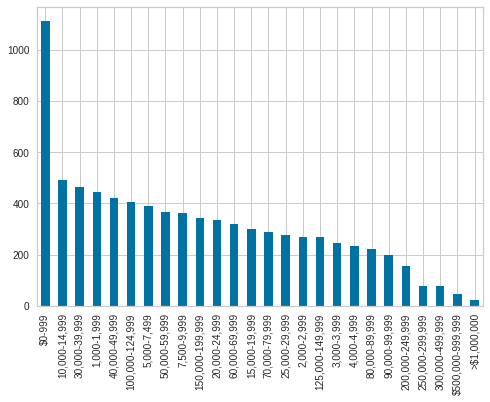

In [19]:
# plot salary histogram
dataset.salary.value_counts().plot(kind='bar')

We removed the '$' sign from the categories and further grouped salary categories into buckets. The aim is to reduce the salary categories from twenty-six to fifteen or less.

In [20]:
# remove dollar sign
dataset['salary'] = dataset.salary.str.replace('$', '')

In [21]:
dataset.salary.unique()

array(['25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '500,000-999,999', '70,000-79,999', '60,000-69,999',
       '40,000-49,999', '>1,000,000', '300,000-499,999'], dtype=object)

In [22]:
# further group salary buckets to reduce number of categories
dataset['salary'] = dataset.salary.str.replace(
        '0-999', '0-9,999'
    ).str.replace(
        '1,000-1,999', '0-9,999'
    ).str.replace(
        '2,000-2,999', '0-9,999'
    ).str.replace(
        '3,000-3,999', '0-9,999'
    ).str.replace(
        '4,000-4,999', '0-9,999'
    ).str.replace(
        '5,000-7,499', '0-9,999'
    ).str.replace(
        '7,500-9,999', '0-9,999'
    ).str.replace(
        '10,000-14,999', '10,000-19,999'
    ).str.replace(
        '15,000-19,999', '10,000-19,999'
    ).str.replace(
        '20,000-24,999', '20,000-29,999'
    ).str.replace(
        '25,000-29,999', '20,000-29,999'
    ).str.replace(
        '25,000-29,999', '20,000-29,999'
    ).str.replace(
        '200,000-249,999', '200,000-299,999'
    ).str.replace(
        '250,000-299,999', '200,000-299,999'
    ).str.replace(
        '300,000-499,999', '>300,000'
    ).str.replace(
        '500,000-999,999', '>300,000'
    ).str.replace(
        '>1,000,000', '>300,000'
    ).str.replace(
        '500,000-9,999,999', '>300,000'
    )

We can see that the number of categories are reduced. However, majority of the `salary` observations are in one bucket. This may introduce bias in our model. We will fix this while setting up the data for modelling.

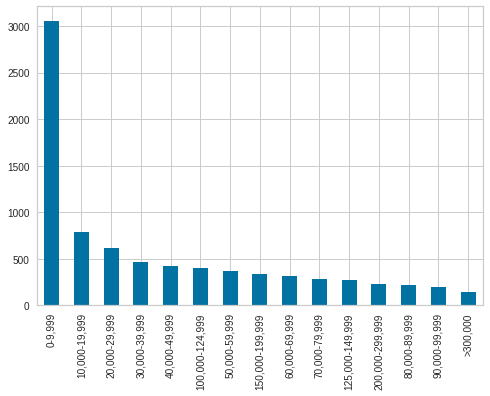

In [23]:
dataset.salary.value_counts().plot(kind="bar")

###Section 2 - Exploratory Data Analysis and Feature Selection

In [28]:
dataset.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In order to demonstrate the `predict_model()` function on unseen data, a sample of 407 records has been withheld from the original dataset to be used for predictions. Another way to think about this is that these 407 records were not available at the time when the machine learning experiment was performed.

In [29]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print(f'Data for Modelling: {data.shape}')
print(f'Unseen Data for Predictions: {data_unseen.shape}')

Data for Modelling: (7729, 14)
Unseen Data for Predictions: (407, 14)


Based on the data profile analysis, we made some critical pre-processing choices while setting up the data. Below are the steps taken in the setup:

* **Missing Values:** `academic_research and ml_experience` have missing values. Both columns are categorical and we used `imputation_type = 'simple'` and `categorical_imputation = 'constant'` to fill not available for missing observations.

* **Multicollinearity:** There are high correlations between `coding_experience and ml_experience, job_title and employer_industry` which introduces multicollinearity into the data. We removed multi-collinearity by using the `remove_multicollinearity` and parameter.

* **High Cardinality:** `country` has high cardinality with 58 unique values. We handled this using `high_cardinality_features` and `high_cardinality_method = 'frequency'` in the setup

* **Fix Imbalance:** The target class `salary` is imbalanced with lots of observations in the first bucket. We fixed this using the `fix_imbalance`. When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is used as a default method for resampling. 

In [30]:
setup_data = setup(
                  dataset, target = 'salary', 
                  session_id=123, 
                  imputation_type  = 'simple',
                  categorical_imputation = 'constant',
                  handle_unknown_categorical  = True,
                  unknown_categorical_method = 'least_frequent',
                  remove_outliers = True,
                  high_cardinality_features = ['country'],
                  high_cardinality_method = 'frequency',
                  feature_selection = True,
                  fix_imbalance = True,
                  remove_multicollinearity = True,
                  multicollinearity_threshold = 0.4,
                  log_experiment = True, experiment_name = 'salary'
                )

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                              salary  
2                                          Multiclass  
3   0-9,999: 0, 10,000-19,999: 1, 100,000-124,999:...  
4                                          (8136, 14)  
5                                                True  
6                                                   0  
7                                                  13  
8                                               False  
9                                                True  
10                                          frequency  
11                                         (5410, 68)  
12                                         (2441, 68)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                               True  
20                                             s

INFO:logs:Logging experiment in MLFlow
2022/12/16 08:06:58 INFO mlflow.tracking.fluent: Experiment with name 'salary' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='salary',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume

Before proceeding with the selection of models, we need to understand which metric is most valuable to us. Choosing a metric in a classification experiment depends on the problem we're trying to solve. There is always a trade-off between Precision and Recall. This means we have to choose and favour a balance between True Positives and False Negatives.

Here, the final model will be used to predict salary and accuracy is quite low. We want to choose a model with a better ability to have True Positives (better Recall), even if it comes with the cost of some False Positives (lower Precision). We need to however keep a tab on the trade-offs in Precision and AUC.


We will go ahead and create two models namely Random Forest Classifier (rf), and Extra-Tree Classifier (et) with best Recall and reasonable AUC/Precision.

In [31]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.3817  0.7661  0.1583  0.3071   
rf               Random Forest Classifier    0.3811  0.7497  0.1500  0.2910   
et                 Extra Trees Classifier    0.3708  0.7314  0.1537  0.2859   
dummy                    Dummy Classifier    0.3684  0.5000  0.0667  0.1357   
gbc          Gradient Boosting Classifier    0.3603  0.7631  0.1589  0.3057   
nb                            Naive Bayes    0.2754  0.6747  0.1345  0.2950   
dt               Decision Tree Classifier    0.2710  0.5763  0.1496  0.2890   
ridge                    Ridge Classifier    0.2536  0.0000  0.1472  0.2978   
lda          Linear Discriminant Analysis    0.2272  0.6899  0.1462  0.3188   
lr                    Logistic Regression    0.2262  0.6856  0.1390  0.3113   
ada                  Ada Boost Classifier    0.2248  0.6818  0.1418  0.2666   
knn                K Neighbors Classifier    0.2055  0.6255  0.1624  0.3671   
svm                   SVM - Linear Kernel    0.1111  0.0000  0.0763  0.2907   
qda       Quadratic Discriminant Analysis    0.0702  0.5313  0.0885  0.0474   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.3282  0.1978  0.2043    16.126  
rf        0.3129  0.1798  0.1901     7.025  
et        0.3095  0.1751  0.1831     6.492  
dummy     0.1984  0.0000  0.0000     0.130  
gbc       0.3243  0.1901  0.1930   176.338  
nb        0.2801  0.1409  0.1418     0.163  
dt        0.2786  0.1310  0.1312     0.744  
ridge     0.2659  0.1322  0.1338     0.158  
lda       0.2569  0.1223  0.1245     0.519  
lr        0.2543  0.1184  0.1203    33.276  
ada       0.2345  0.0959  0.0974     3.634  
knn       0.2388  0.1206  0.1251     1.107  
svm       0.0841  0.0239  0.0295    20.531  
qda       0.0499  0.0135  0.0149     0.270

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


###Section 3 - Model Implementation and Tuning

In [32]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.3956  0.7499  0.1569  0.3043  0.3270  0.2002  0.2116
1       0.3808  0.7639  0.1541  0.2916  0.3130  0.1801  0.1906
2       0.3789  0.7557  0.1341  0.2630  0.2951  0.1664  0.1797
3       0.3752  0.7350  0.1440  0.2922  0.3116  0.1712  0.1811
4       0.3863  0.7625  0.1559  0.3024  0.3204  0.1911  0.2013
5       0.3660  0.7333  0.1361  0.2729  0.2961  0.1552  0.1648
6       0.3863  0.7445  0.1642  0.3061  0.3232  0.1890  0.1987
7       0.3771  0.7502  0.1516  0.3007  0.3171  0.1823  0.1904
8       0.4011  0.7576  0.1592  0.3084  0.3313  0.2068  0.2184
9       0.3641  0.7442  0.1442  0.2680  0.2947  0.1553  0.1647
Mean    0.3811  0.7497  0.1500  0.2910  0.3129  0.1798  0.1901
Std     0.0111  0.0100  0.0095  0.0161  0.0128  0.0168  0.0171

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [33]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.3715  0.7448  0.1544  0.2932  0.3150  0.1791  0.1865
1       0.3752  0.7310  0.1561  0.2946  0.3155  0.1808  0.1892
2       0.3734  0.7361  0.1588  0.2755  0.3059  0.1777  0.1863
3       0.3845  0.7118  0.1690  0.3064  0.3213  0.1887  0.1988
4       0.3734  0.7374  0.1455  0.2826  0.3078  0.1785  0.1871
5       0.3623  0.7276  0.1622  0.2807  0.3070  0.1679  0.1743
6       0.3678  0.7252  0.1579  0.2976  0.3175  0.1802  0.1859
7       0.3660  0.7347  0.1477  0.2893  0.3112  0.1738  0.1803
8       0.3715  0.7394  0.1360  0.2720  0.3004  0.1668  0.1766
9       0.3623  0.7265  0.1493  0.2669  0.2938  0.1573  0.1661
Mean    0.3708  0.7314  0.1537  0.2859  0.3095  0.1751  0.1831
Std     0.0063  0.0088  0.0089  0.0118  0.0079  0.0085  0.0086

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Hyperparameter Tuning**

In order to find the best hyperparameters for the model, we used the `tune_model` function which loops through pre-defined hyper-parameter grids to find the best parameters for our model through 10 fold cross-validation. PyCaret uses the standard Randomized-Grid search to iterate through the parameters. Within the `tune_model` function, PyCaret also allows us to specify the metric we want to optimize. The default is Accuracy, but chose recall here since it is the metric we would want to increase/optimize.

In [ ]:
rf_tuned = tune_model(rf, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.3789  0.7190  0.1300  0.2992  0.2896  0.1610  0.1775
1       0.3789  0.7335  0.1418  0.2463  0.2838  0.1621  0.1787
2       0.4067  0.7310  0.1821  0.2537  0.2984  0.1880  0.2116
3       0.3623  0.6925  0.1235  0.2573  0.2800  0.1346  0.1487
4       0.3863  0.7219  0.1641  0.2868  0.3043  0.1823  0.1969
5       0.3808  0.7254  0.1475  0.2365  0.2808  0.1600  0.1775
6       0.3771  0.7345  0.1507  0.2515  0.2850  0.1548  0.1713
7       0.3789  0.7274  0.1396  0.3040  0.2902  0.1597  0.1758
8       0.3900  0.7157  0.1467  0.2704  0.2954  0.1711  0.1901
9       0.3863  0.7262  0.1561  0.3436  0.2993  0.1647  0.1837
Mean    0.3826  0.7227  0.1482  0.2749  0.2907  0.1638  0.1812
Std     0.0107  0.0116  0.0159  0.0315  0.0080  0.0140  0.0157

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


The code below tuned the Extra Tress classifier to optimize **‘Recall’ ** and displayed the 6 metrics for each fold. We see that Mean Recall has improved from 15.9% in base Extra Trees Classifier to 16.7% here. However, it was lower than 15.5% of base ‘rf’ that we created earlier.

In [ ]:
et_tuned = tune_model(et, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.3567  0.7576  0.1815  0.3496  0.3385  0.2161  0.2190
1       0.3420  0.7557  0.1848  0.3203  0.3168  0.1907  0.1933
2       0.3364  0.7601  0.1595  0.3172  0.3178  0.1876  0.1899
3       0.2939  0.7236  0.1545  0.3112  0.2944  0.1553  0.1574
4       0.3235  0.7521  0.1620  0.3193  0.3070  0.1830  0.1854
5       0.3068  0.7582  0.1474  0.3030  0.2919  0.1601  0.1623
6       0.3124  0.7672  0.1632  0.3126  0.3087  0.1730  0.1741
7       0.3216  0.7550  0.1788  0.3165  0.3115  0.1837  0.1858
8       0.3364  0.7542  0.1769  0.3208  0.3228  0.1945  0.1958
9       0.3050  0.7535  0.1643  0.2962  0.2919  0.1564  0.1582
Mean    0.3235  0.7537  0.1673  0.3167  0.3101  0.1801  0.1821
Std     0.0184  0.0108  0.0119  0.0133  0.0141  0.0182  0.0184

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


We used the `plot_model()` function of PyCaret to see features which are important in our predictions. Country appeared to be the most important feature. This means that salary varies a lot by country. The next 3 features are ML Incoporation, Coding Experience (20+ years) and Money Spent(100000USD or more).

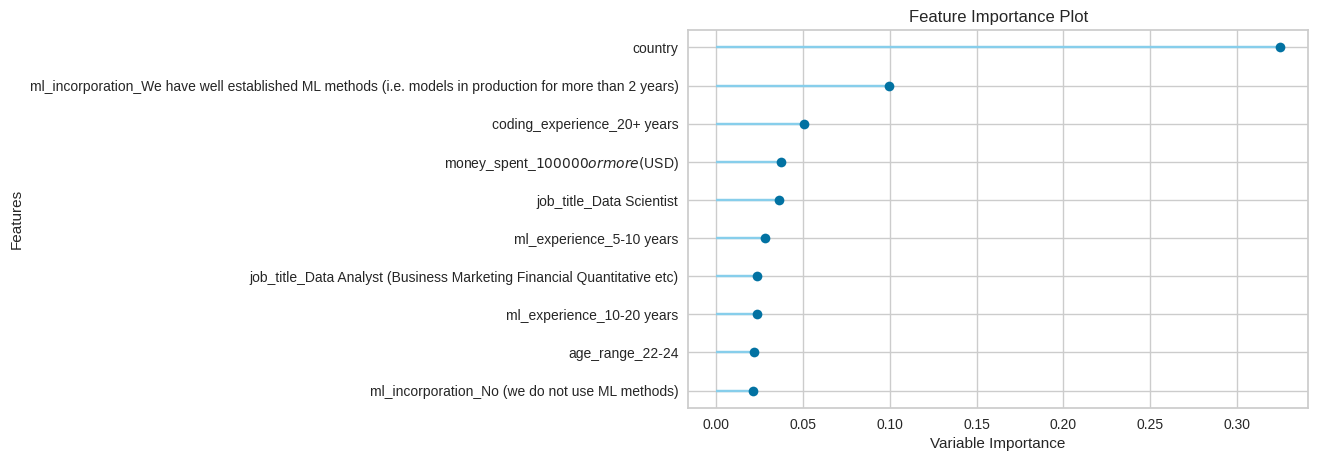

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(et_tuned, plot='feature')

In [ ]:
predict_model(et_tuned);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier     0.315  0.7478  0.1593  0.3241  0.3089  0.1659   

      MCC  
0  0.1678

###Section 4 - Finalize Model 

`automl` function in pycaret.classification and pycaret.regression will re-fit the model on the entire dataset. As such, for the model to be fitted on the entire dataset including the holdout set, finalize_model was explicitly used.

In [ ]:
et_finalize = finalize_model(et_tuned)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurit

###Section 5 - Predict on Unseen Data

We used `predict_model()` to generate prediction and the score (probability attached to prediction). The prediction dataframe also contains all the features and initial salary bucket for each observation. Out of the 5 columns shown in the prediction dataframe, our predicted one label correctly.

In [ ]:
unseen_predictions = predict_model(et_tuned, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  Extra Trees Classifier       0.0  0.7916       0      0   0      0    0

age_range gender                   country             degree  \
0     30-34    Man  United States of America    Master’s degree   
1     35-39    Man                     Chile  Bachelor’s degree   
2     35-39    Man                     Italy    Doctoral degree   
3     40-44    Man                  Colombia    Master’s degree   
4     25-29    Man                     India  Bachelor’s degree   

  academic_research coding_experience ml_experience                job_title  \
0               Yes        5-10 years     2-3 years           Data Scientist   
1               NaN        5-10 years     4-5 years           Data Scientist   
2               Yes       10-20 years   10-20 years       Research Scientist   
3               Yes         1-3 years     1-2 years  Engineer (non-software)   
4               NaN         1-3 years  Under 1 year        Software Engineer   

        employer_industry          company_size team_size  \
0      Accounting/Finance      50-249 employees       5-9   
1           Marketing/CRM  1000-9,999 employees       1-2   
2     Academics/Education  1000-9,999 employees         0   
3    Computers/Technology        0-49 employees       1-2   
4  Medical/Pharmaceutical        0-49 employees       5-9   

                                    ml_incorporation           salary  \
0  We are exploring ML methods (and may one day p...  150,000-199,999   
1  We recently started using ML methods (i.e., mo...    50,000-59,999   
2                                      I do not know    10,000-19,999   
3  We are exploring ML methods (and may one day p...    20,000-29,999   
4  We use ML methods for generating insights (but...    30,000-39,999   

    money_spent            Label   Score  
0     $100-$999  125,000-149,999  0.1765  
1  $1000-$9,999    50,000-59,999  0.1131  
2     $0 ($USD)          0-9,999  0.1568  
3     $100-$999    50,000-59,999  0.1106  
4        $1-$99          0-9,999  0.3257

In [ ]:
save_model(et_finalize, "salary_pred_111222")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), model_name=salary_pred_111222, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='salary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced_subsample',
                                       criterion='gini', max_depth=6,
                                       max_features=1.0, ma